<a href="https://colab.research.google.com/github/Iveynganga/PYTHON-DATA-ANALYSIS/blob/main/SephoraCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [4]:
sephora = pd.read_csv('/content/product_info.csv.zip')

sephora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [14]:
sephora.primary_category.value_counts(dropna=False)

primary_category
Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: count, dtype: int64

1. Top 30 most purchased makeup products on the Sephora website


In [26]:
import pandas as pd

# Read the dataset
sephora = pd.read_csv('/content/product_info.csv.zip')

# Group by product name and brand name, summing up the love count
product_sales = sephora.groupby(['product_name', 'brand_name'])['loves_count'].sum()

# Sort the results to find the most purchased makeup products
most_purchased = product_sales.sort_values(ascending=False)

# Display the top 30 most purchased makeup products
print(most_purchased.head(30))

product_name                                                         brand_name                 
Soft Pinch Liquid Blush                                              Rare Beauty by Selena Gomez    1401068
Radiant Creamy Concealer                                             NARS                           1153594
Lip Sleeping Mask Intense Hydration with Vitamin C                   LANEIGE                        1081315
Cream Lip Stain Liquid Lipstick                                      SEPHORA COLLECTION             1029051
Gloss Bomb Universal Lip Luminizer                                   Fenty Beauty by Rihanna         968317
Pro Filt’r Soft Matte Longwear Liquid Foundation                     Fenty Beauty by Rihanna         856497
Blush                                                                NARS                            840076
Brow Wiz Ultra-Slim Precision Brow Pencil                            Anastasia Beverly Hills         834189
Translucent Loose Setting Powder       

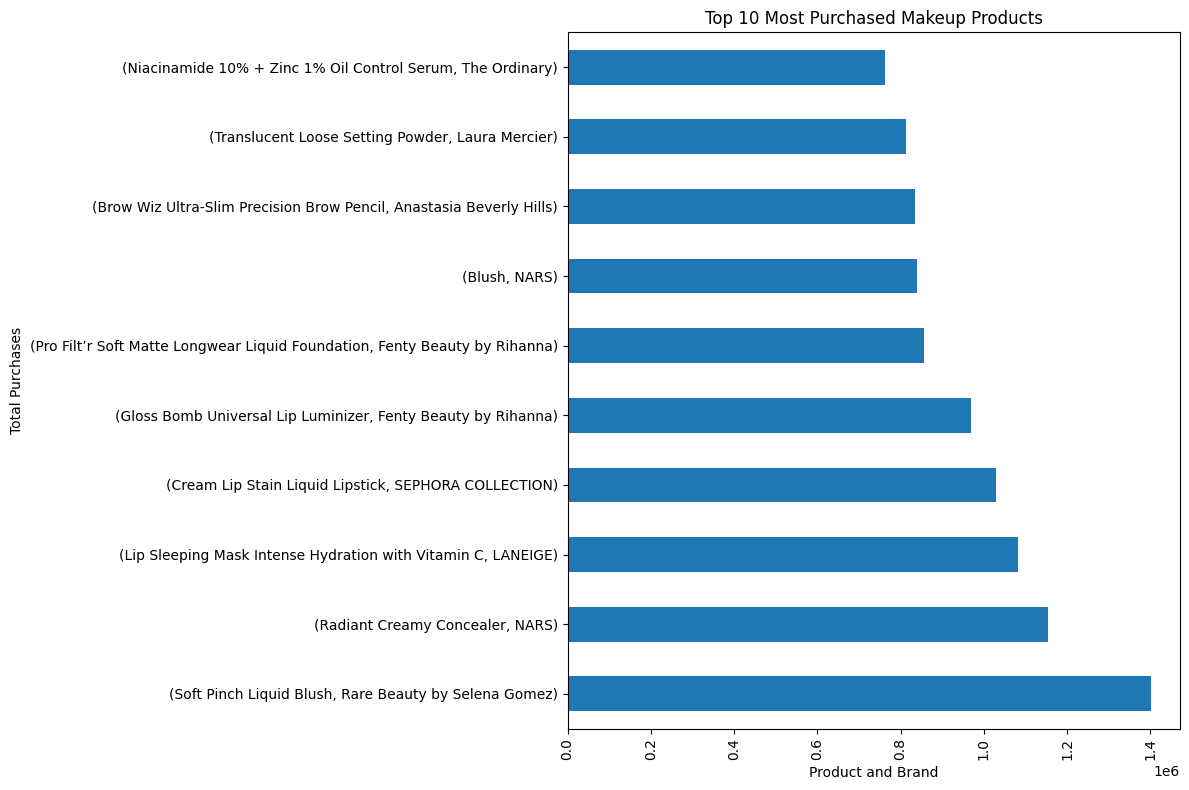

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
sephora = pd.read_csv('/content/product_info.csv.zip')

# Group by product name and brand name, summing up the total purchases
product_sales = sephora.groupby(['product_name', 'brand_name'])['loves_count'].sum()

# Sort the results to find the most purchased makeup products
most_purchased = product_sales.sort_values(ascending=False)

# Specify the number of top products to visualize
top_n = 10

# Select the top N most purchased products
top_n_products = most_purchased.head(top_n)

# Plot the top N most purchased products
plt.figure(figsize=(12, 8))
top_n_products.plot(kind='barh')
plt.title(f'Top {top_n} Most Purchased Makeup Products')
plt.xlabel('Product and Brand')
plt.ylabel('Total Purchases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

2. Top 30 most purchased skincare products

In [30]:
import pandas as pd

# Read the dataset
sephora = pd.read_csv('/content/product_info.csv.zip')

# Filter the dataset for products in the skincare category
skincare_products = sephora[sephora['primary_category'] == 'Skincare']

# Group by product name, summing up the total purchases
product_sales = skincare_products.groupby(['product_name', 'brand_name'])['loves_count'].sum()

# Sort the results to find the top skincare products
top_skincare_products = product_sales.sort_values(ascending=False)

# Display the top 30 skincare products
print(top_skincare_products.head(30))

product_name                                          brand_name         
Lip Sleeping Mask Intense Hydration with Vitamin C    LANEIGE                1081315
Niacinamide 10% + Zinc 1% Oil Control Serum           The Ordinary            763168
Hyaluronic Acid 2% + B5 Hydrating Serum               The Ordinary            720504
Glycolic Acid 7% Exfoliating Toning Solution          The Ordinary            542743
AHA 30% + BHA 2% Exfoliating Peeling Solution         The Ordinary            533877
Lip Glowy Balm                                        LANEIGE                 471406
Protini Polypeptide Firming Refillable Moisturizer    Drunk Elephant          411372
Superfood Antioxidant Cleanser                        Youth To The People     404142
Green Clean Makeup Removing Cleansing Balm            Farmacy                 403801
Watermelon Glow Niacinamide Dew Drops                 Glow Recipe             389213
The Dewy Skin Cream Plumping & Hydrating Moisturizer  Tatcha                

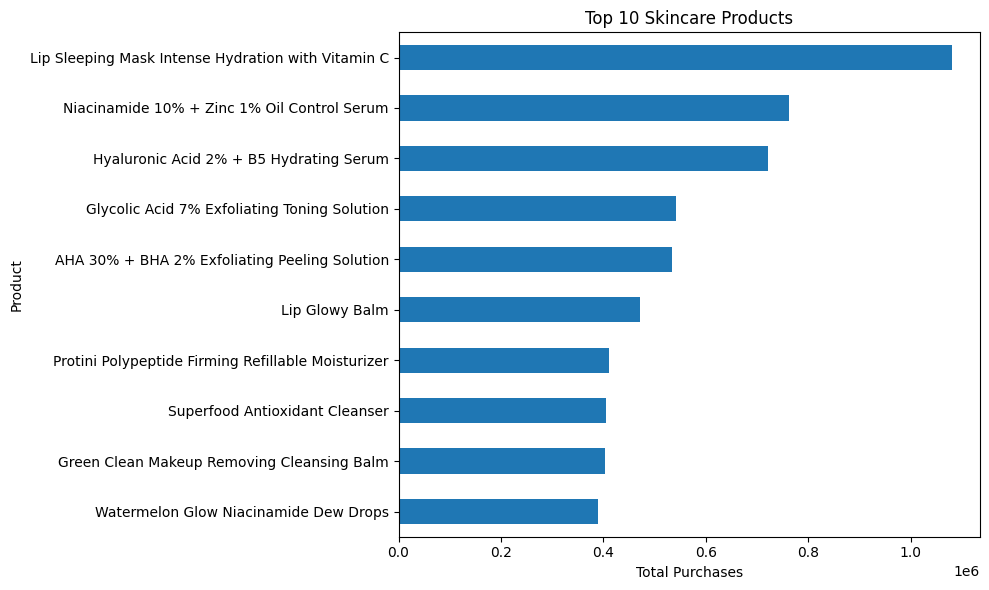

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
sephora = pd.read_csv('/content/product_info.csv.zip')

# Filter the dataset for products in the skincare category
skincare_products = sephora[sephora['primary_category'] == 'Skincare']

# Group by product name, summing up the total purchases
product_sales = skincare_products.groupby('product_name')['loves_count'].sum()

# Sort the results to find the top skincare products
top_skincare_products = product_sales.sort_values(ascending=False)

# Specify the number of top products to visualize
top_n = 10

# Select the top N skincare products
top_n_products = top_skincare_products.head(top_n)

# Plot the top N skincare products as a horizontal bar plot
plt.figure(figsize=(10, 6))
top_n_products.sort_values().plot(kind='barh')
plt.title(f'Top {top_n} Skincare Products')
plt.xlabel('Total Purchases')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

Which 10 brands had the lowest rating?

In [37]:
import pandas as pd

# Read the dataset
sephora = pd.read_csv('/content/product_info.csv.zip')

# Group by brand name, calculate the average rating
brand_ratings = sephora.groupby(['product_name', 'brand_name'])['rating'].mean()

# Sort the results to find the brands with the lowest ratings
lowest_rated_brands = brand_ratings.sort_values().head(10)

# Display the 10 brands with the lowest ratings
print(lowest_rated_brands)

product_name                                 brand_name            
BLEU DE CHANEL After Shave Lotion            CHANEL                    1.0
Mini Healthy Hair Refresh Dry Shampoo        Virtue                    1.0
Beautiful Skin Bronzing Brush                Charlotte Tilbury         1.0
Mini Blossoms Travel Spray Trio Set          Jo Malone London          1.0
NuBODY - Body Toning Device                  NuFACE                    1.0
25 Years of Dr. Brandt Kit                   Dr. Brandt Skincare       1.0
Hydro Ungrip Reusable Makeup Remover Pads    MILK MAKEUP               1.0
Vivid Tones Vibrancy Shampoo                 Curlsmith                 1.0
Cozy Vibes Mini Candle Set                   SEPHORA COLLECTION        1.0
Mini Grandioso Extra Volumizing Conditioner  Rossano Ferretti Parma    1.0
Name: rating, dtype: float64


Which 10 brands had the highest rating?

In [45]:
# Step 1: Group by brand name and calculate average rating
brand_ratings = sephora.groupby(['product_name', 'brand_name'])['rating'].mean().reset_index(name='average_rating')

# Step 2: Sort by average rating to find top-rated brands
top_rated_brands = brand_ratings.sort_values(by='average_rating', ascending=False)

# Step 3: Select top 10 rated brands
top_10_brands = top_rated_brands.head(10)

# Display the top 10 rated brands
print("Top 10 Rated Brands:")
print(top_10_brands)

Top 10 Rated Brands:
                                           product_name  \
140   801 Sea Spray, Cedar and Grapefruit Eau de Parfum   
1918                                DelIKate Try Me Kit   
6450                        Rituals by Canopy Aroma Kit   
2673                    Fringe False Eyelash & Glue Set   
4908                     Mini Perfect Eau de Parfum Set   
4590                    Mini Dolce Nourishing Hair Mask   
4915                     Mini Perfume Icons Sampler Set   
6672                                Sauvage Shaving Gel   
2856             Gin Twist Leave-In Conditioning Styler   
2131         Driftwood & Chamomile Misting Diffuser Oil   

                  brand_name  average_rating  
140            Bon Parfumeur             5.0  
1918         Kate Somerville             5.0  
6450                  CANOPY             5.0  
2673      SEPHORA COLLECTION             5.0  
4908  Marc Jacobs Fragrances             5.0  
4590  Rossano Ferretti Parma             5.0  


<ipython-input-48-8cd3692321ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='brand_name', data=top_10_brands, palette='pastel')


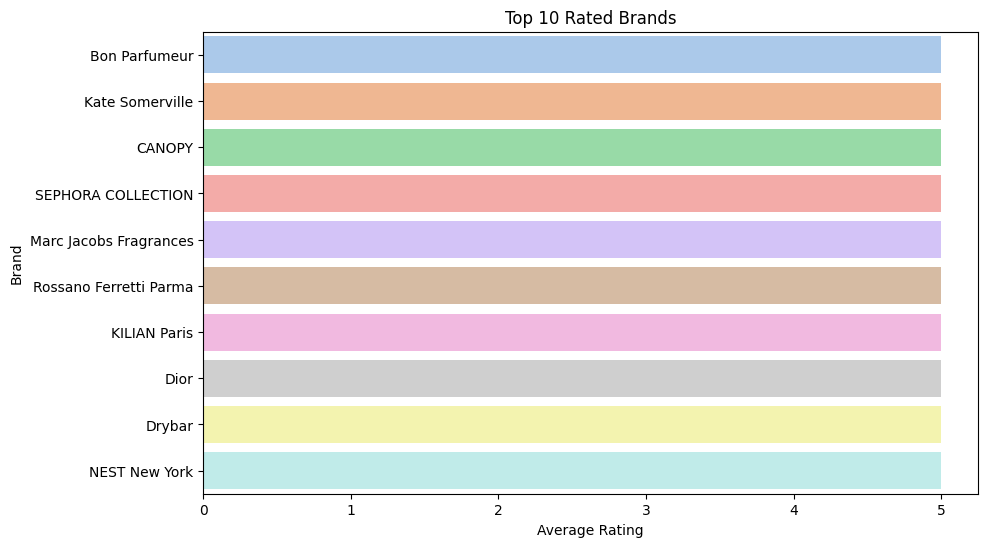

In [48]:
import seaborn as sns

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='average_rating', y='brand_name', data=top_10_brands, palette='pastel')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.title('Top 10 Rated Brands')
plt.show()

What are the top three rated fragrance brands?

In [40]:
# Step 1: Filter the dataset to include only fragrance products
fragrance_data = sephora[sephora['primary_category'] == 'Fragrance']

# Step 2: Group by fragrance name and brand name, and calculate average rating
fragrance_ratings = fragrance_data.groupby(['product_name', 'brand_name'])['rating'].mean().reset_index(name='average_rating')

# Step 3: Sort by average rating to find top-rated fragrances
top_rated_fragrances = fragrance_ratings.sort_values(by='average_rating', ascending=False)

# Step 4: Select top three rated fragrances and their brands
top_three_fragrances = top_rated_fragrances.head(3)

# Display the top three rated fragrances and their brands
print("Top Three Rated Fragrances and Brands:")
print(top_three_fragrances)

Top Three Rated Fragrances and Brands:
                       product_name brand_name  average_rating
561   Hero Eau de Toilette Gift Set   BURBERRY             5.0
1137              Rose Prick Candle   TOM FORD             5.0
414                     Eros Parfum    Versace             5.0


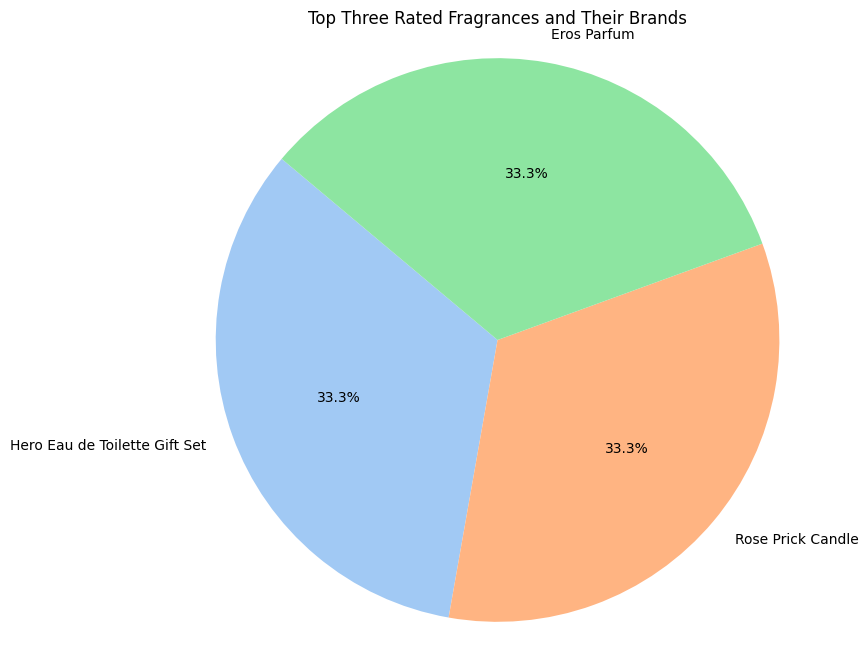

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting fragrance names, brands, and ratings for plotting
fragrance_names = top_three_fragrances['product_name']
brands = top_three_fragrances['brand_name']
ratings = top_three_fragrances['average_rating']

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ratings, labels=fragrance_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), textprops={'fontsize': 10})
plt.title('Top Three Rated Fragrances and Their Brands')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()